# Concentration distribution - analytical solution
#### Tomasz Makowski

## Import of required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import pint
from open_atmos_jupyter_utils import show_plot

## Initialize unit registry

In [2]:
si = pint.UnitRegistry()

## Mathematical model explanation

#### Mathematical model

The provided function describes how the concentration $ c(x, t) $ of a substance evolves spatially and temporally based on the advection-diffusion equation:

$$ \frac{\partial c}{\partial t} + U\frac{\partial c}{\partial x} = D\frac{\partial^2 c}{\partial x^2} $$

where:

- $M$: total amount of substance $(kg)$
- $A$: volumetric flow rate $(m^3/s)$
- $D$: diffusion coefficient $(m^2/s)$
- $U$: fluid velocity $(m/s)$


#### Context

This model is extensively used in fields such as fluid mechanics, environmental engineering, and meteorology to analyze phenomena like pollutant dispersion, thermal diffusion, and general transport processes.


#### Type of solution

The equation captures both advection, representing the transport of the substance due to bulk fluid motion, and diffusion, representing the spread caused by molecular-level random motion. As time progresses, the peak of the concentration distribution moves in the direction of the flow velocity ($U$), while simultaneously broadening as a result of diffusive processes characterized by the diffusion coefficient ($D$).


## Analytical Solution

In [3]:
def concentration_profile(
    x: np.ndarray,
    t: np.ndarray,
    M: float = 1.0 * si.kg,
    A: float = 1.0 * si.m**3 / si.s,
    D: float = 1.0 * si.m**2 / si.s,
    U: float = 1.0 * si.m / si.s,
) -> np.ndarray:
    """
    Compute the spatial-temporal concentration profile of a substance.

    Args:
        x: Spatial coordinate array.
        t: Time coordinate array.
        M: Total mass of the substance released.
        A: Volumetric flow rate.
        D: Diffusion coefficient.
        U: Advection velocity.

    Returns:
        Concentration array as a function of position and time.
    """
    X, T = np.meshgrid(x.magnitude, t.magnitude)
    X = X * x.units
    T = T * t.units

    exponent = -((U * T - X) ** 2) / (4 * D * T)

    concentration = (
        M / (A * 2 * np.sqrt(np.pi * D * T**3))
        * X
        * np.exp(exponent)
    )

    return concentration

## Plot

#### Matplotlib set

In [4]:
si.setup_matplotlib()

#### Spatial domain for the plot


In [5]:
x = np.linspace(0, 10, 200) * si.m
t = np.linspace(0.1, 100, 100) * si.s

#### Concentration calculation

In [6]:
concentration = concentration_profile(
    x, t, M=1.0 * si.kg, A=1.0 * si.m**3 / si.s, D=0.003 * si.m**2 / si.s, U=0.045 * si.m / si.s
)

#### Plot using matplotlib with pint unit handling


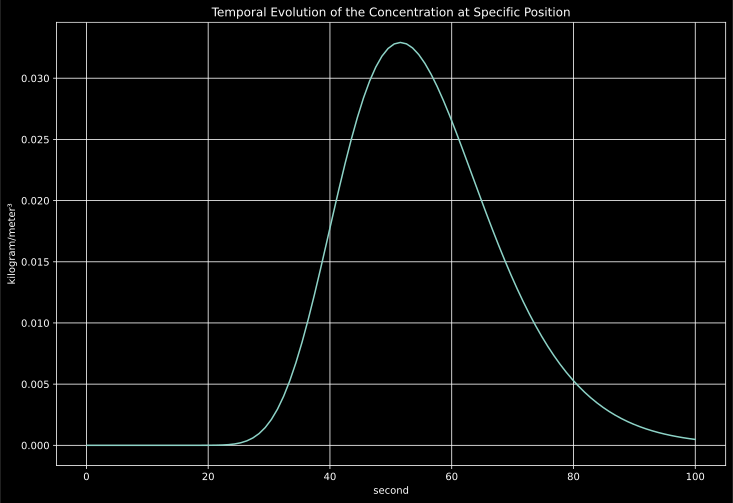

In [7]:
fig = plt.figure(figsize=(12, 8))
plt.plot(t, concentration[:, 50])
plt.title("Temporal Evolution of the Concentration at Specific Position")
plt.grid(True)
show_plot(fig=fig)